# Mushroom Classification

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Reading the dataset into python

In [7]:
df=pd.read_csv("c:/Users/Sreehari/Downloads/mushrooms.csv")

In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [11]:
df.shape

(8124, 23)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# insights

: there are 22 feature columns and 8124 rows.

: All columns are categorical

: there are no null values

# Visualizations based on easily identifiable featuers

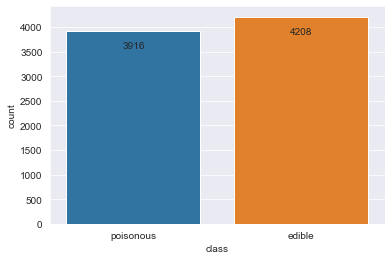

In [14]:
sns.set_style('darkgrid')
ax = sns.countplot(x = df['class'])
plt.xticks(ticks = [0, 1], labels = ['poisonous', 'edible'])
rects = ax.patches
for bar in rects:
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/2
    ax.annotate(f'\n{y_value}', (x_value, y_value), va='top', ha='center')
plt.show()

The dataset is mostly balenced

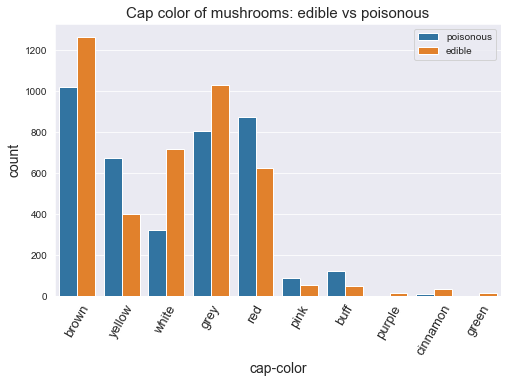

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = 'cap-color', hue='class')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
           labels = ['brown', 'yellow', 'white', 'grey', 'red', 'pink', 'buff', 'purple', 'cinnamon', 'green'], fontsize = 13, rotation = 60)
plt.xlabel('cap-color', fontsize=14)
plt.ylabel('count', fontsize = 14)
plt.title('Cap color of mushrooms: edible vs poisonous', fontsize = 15)
plt.legend(labels=['poisonous', 'edible'], loc='upper right')
plt.show()

As we can see, it is not a good idea to distinguish mushrooms based on color, as we can't get a clear idea

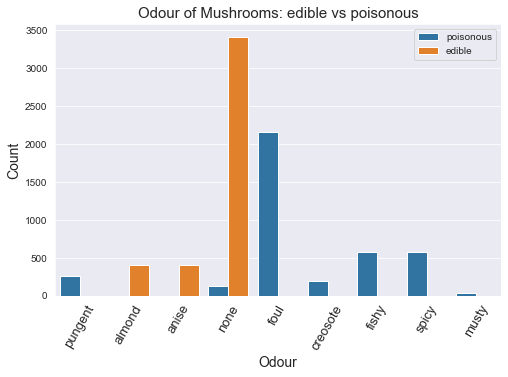

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = 'odor', hue='class')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8], 
           labels = ['pungent', 'almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty'], fontsize = 13, rotation = 60)
plt.xlabel('Odour', fontsize=14)
plt.ylabel('Count', fontsize = 14)
plt.title('Odour of Mushrooms: edible vs poisonous', fontsize = 15)
plt.legend(labels=['poisonous', 'edible'], loc='upper right')
plt.show()

:Strong smelling mushrooms that have foul or fishy odour are poisonous

:Mushrooms with generally seem to be edible

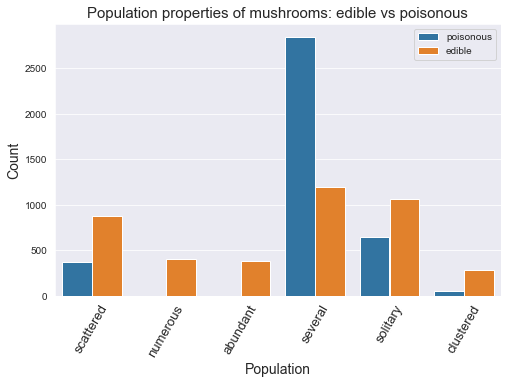

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = 'population', hue='class')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], 
           labels = ['scattered', 'numerous', 'abundant', 'several', 'solitary', 'clustered'], fontsize = 13, rotation = 60)
plt.xlabel('Population', fontsize=14)
plt.ylabel('Count', fontsize = 14)
plt.title('Population properties of mushrooms: edible vs poisonous', fontsize = 15)
plt.legend(labels=['poisonous', 'edible'], loc='upper right')
plt.show()

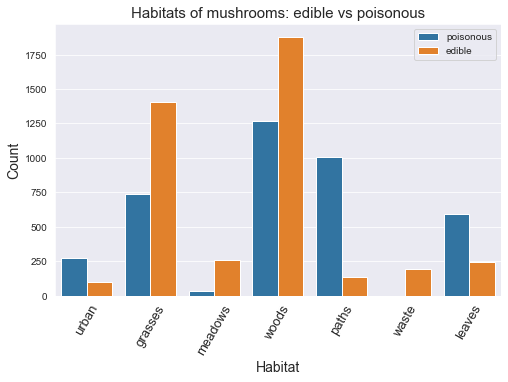

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = 'habitat', hue='class')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], 
           labels = ['urban', 'grasses', 'meadows', 'woods', 'paths', 'waste', 'leaves'], fontsize = 13, rotation = 60)
plt.xlabel('Habitat', fontsize=14)
plt.ylabel('Count', fontsize = 14)
plt.title('Habitats of mushrooms: edible vs poisonous', fontsize = 15)
plt.legend(labels=['poisonous', 'edible'], loc='upper right')
plt.show()

Mushrooms that grow on woods, grasses, leaves or paths have a high chance of being poisonous

# feature selection

Since all features are categorical, we use chi square test to perform feature selection

In [19]:
independent_features = []
p_values = []

Ho: The selected feature and target columns are independent

Ha: The features are dependent

Significance value,alpha:0.05 

In [20]:
def independency_test(df1, df2):
    contingency_table = pd.crosstab(df1, df2)
    observed_values = contingency_table.values
    x2, x2_p_value, deg_of_frdm, exp_val = stats.chi2_contingency(observed=observed_values)
    return x2_p_value

In [21]:
for col in df.columns[1:]:
    p_val = independency_test(df['class'], df[col])
    p_values.append(p_val)
    if p_val > 0.05:
        independent_features.append(col)

In [22]:
print("The column excluding target are: \n", df.columns[1:])

The column excluding target are: 
 Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [23]:
print('Corresponding p values are:\n', p_values)

Corresponding p values are:
 [1.1964565685935438e-103, 5.518427038649143e-68, 6.055814598336576e-78, 0.0, 0.0, 5.501707411861009e-31, 5.0229776137324786e-216, 0.0, 0.0, 4.604746212155192e-20, 7.702047904943513e-290, 0.0, 0.0, 0.0, 0.0, 1.0, 3.32097274916963e-41, 4.23575764172306e-82, 0.0, 0.0, 0.0, 0.0]


In [24]:
print('Independent features are: ', independent_features)

Independent features are:  ['veil-type']


In [25]:
df.drop(columns=['veil-type'], axis= 1, inplace = True)

In [26]:
df.shape

(8124, 22)

In [27]:
X = df.drop(columns=['class'], axis = 1)
y = df['class']

# Encoding

We One-hot encode predictor variables and label encode target column

In [28]:
X = pd.get_dummies(X)

In [29]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

We encoded poisonous as 1 and edible as 0!

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building

In [31]:
lr = LogisticRegression()
model_1 = lr.fit(X_train, y_train)
lr_predict = model_1.predict(X_test)

In [32]:
confusion_matrix(y_test, lr_predict)

array([[843,   0],
       [  0, 782]], dtype=int64)

In [33]:
print('\nThe accuracy score of Logistic regression model is: ', accuracy_score(y_test, lr_predict)*100)


The accuracy score of Logistic regression model is:  100.0


In [35]:
dt = DecisionTreeClassifier()
model_2 = dt.fit(X_train, y_train)
dt_predict = model_2.predict(X_test)

In [36]:
confusion_matrix(y_test, dt_predict)

array([[843,   0],
       [  0, 782]], dtype=int64)

In [37]:
print('\nThe accuracy score of Decision Tree model is: ', accuracy_score(y_test, dt_predict)*100)


The accuracy score of Decision Tree model is:  100.0


In [38]:
gnb = GaussianNB()
model_3 = gnb.fit(X_train, y_train)
gnb_predict = model_3.predict(X_test)

In [39]:
confusion_matrix(y_test, gnb_predict)

array([[778,  65],
       [  0, 782]], dtype=int64)

In [40]:
print('\nThe accuracy score of Decision Tree model is: ', accuracy_score(y_test, gnb_predict)*100)


The accuracy score of Decision Tree model is:  96.0


In [41]:
bnb = BernoulliNB()
model_4 = bnb.fit(X_train, y_train)
bnb_predict = model_4.predict(X_test)

In [42]:
confusion_matrix(y_test, bnb_predict)

array([[827,  16],
       [ 88, 694]], dtype=int64)

In [43]:
print('\nThe accuracy score of Decision Tree model is: ', round(accuracy_score(y_test, bnb_predict)*100, 3))


The accuracy score of Decision Tree model is:  93.6


In [44]:
mnb = MultinomialNB()
model_5 = mnb.fit(X_train, y_train)
mnb_predict = model_5.predict(X_test)

In [45]:
confusion_matrix(y_test, mnb_predict)

array([[837,   6],
       [ 74, 708]], dtype=int64)

In [46]:
print('\nThe accuracy score of Decision Tree model is: ', round(accuracy_score(y_test, mnb_predict)*100, 3))


The accuracy score of Decision Tree model is:  95.077


:Logistic Regression and Decision Tree models give 100% accuracy

:Gaussian Naive-Bayes is better among Naive-Bayes models with 96% accuracy